In [2]:
# cv2 library for image processing
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving photo.jpg to photo.jpg


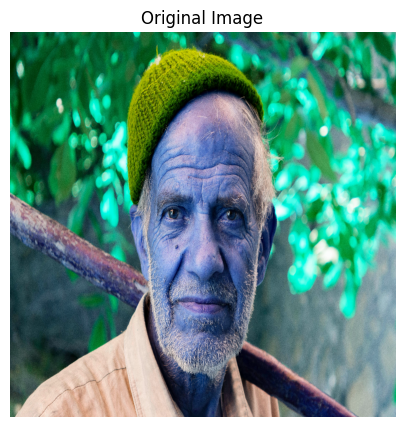

In [7]:
# read the image and resize it to make processing faster
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('photo.jpg')
RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

RGB = cv2.resize(img, (800, 800))
plt.figure(figsize=(10,5))
plt.imshow(RGB)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [5]:
# read the image and resize it to make processing faster
img = cv2.imread('photo.jpg')
img = cv2.resize(img, (800, 800))
print("Original Image")
cv2_imshow(img)

Original Image


Grayscale Image


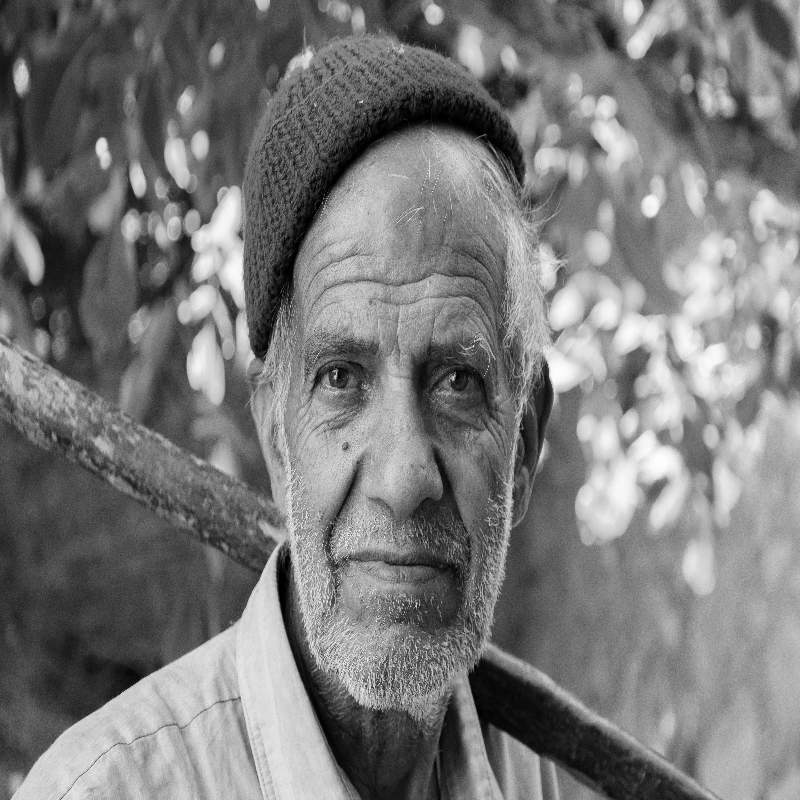

In [6]:
# convert the colored image to grayscale by making each pixel represent 1 channel instead of 3 so that the pixel represent the intensity
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Grayscale Image")
cv2_imshow(gray)

Median Blurred


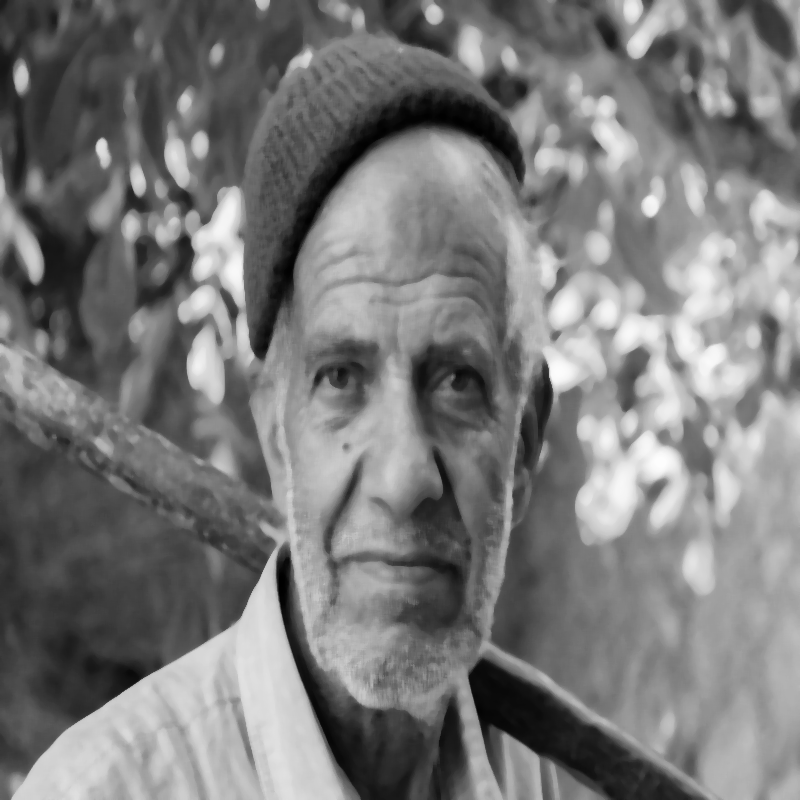

In [7]:
#replace each pixel by the median of it's 7 by 7 neighbors to remove any noise like salt and pepper noise and make it smooth
gray_blur = cv2.medianBlur(gray, 7)
print("Median Blurred")
cv2_imshow(gray_blur)

Edges


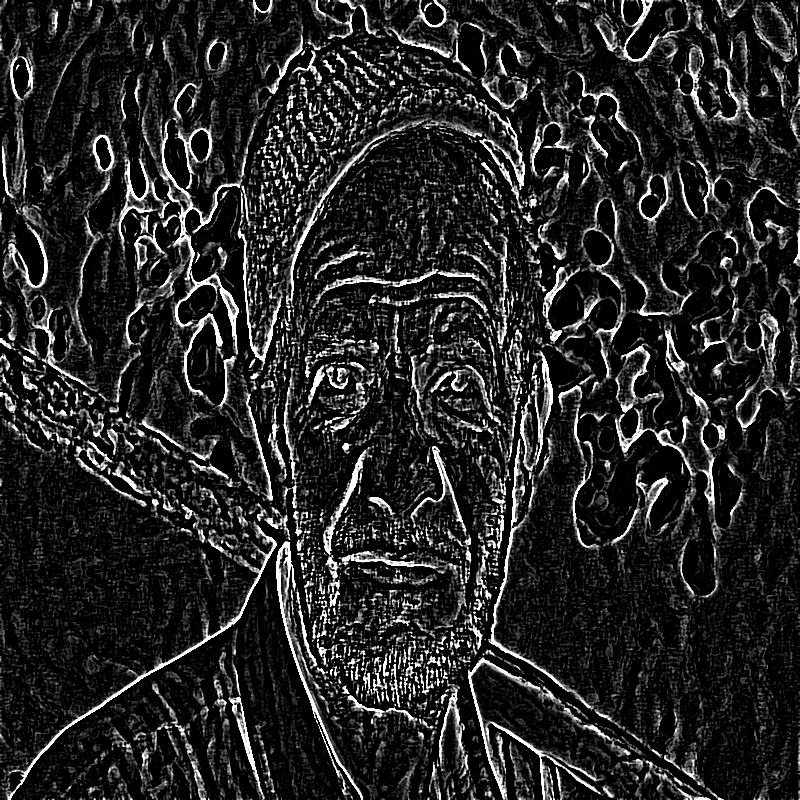

In [8]:
#second derivative filter which measures how fast the intensity changes in all directions
#strong positive or negative means that there is a strong edge
#cv2.CV_8U tells that the output is 8bit unsigned integer to represent values from 0-255
#ksize=5 kernel size is 5 by 5
edges = cv2.Laplacian(gray_blur, cv2.CV_8U, ksize=5)
print("Edges")
cv2_imshow(edges)

Threshold = 50


Threshold = 100


Threshold = 150


Threshold = 200


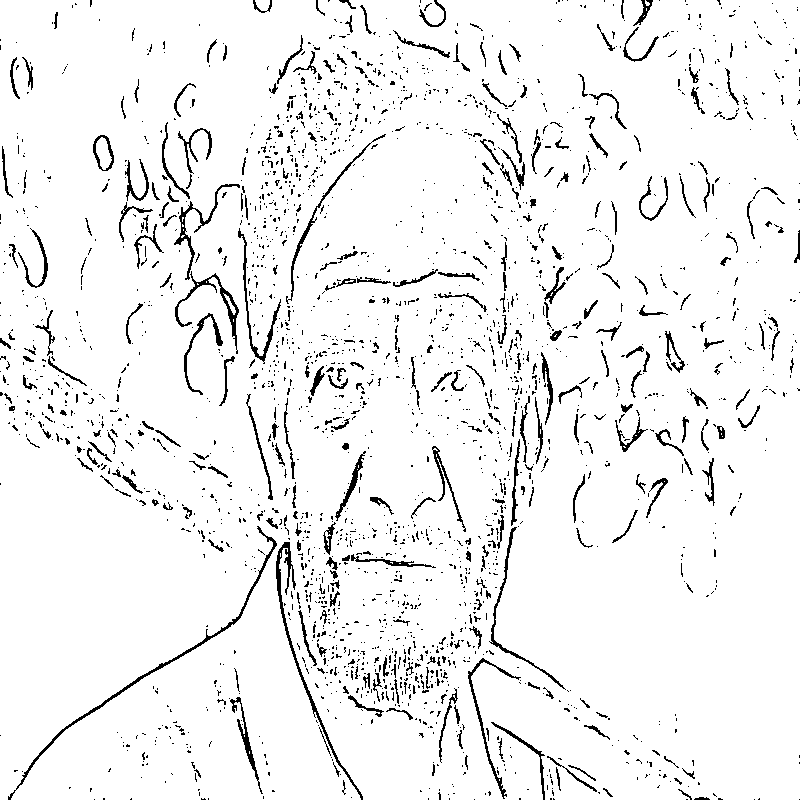

In [9]:
#trying different threshold values
for t in [50, 100, 150, 200]:
    _, mask = cv2.threshold(edges, t, 255, cv2.THRESH_BINARY_INV)
    print(f"Threshold = {t}")
    cv2_imshow(mask)

Threshold Mask


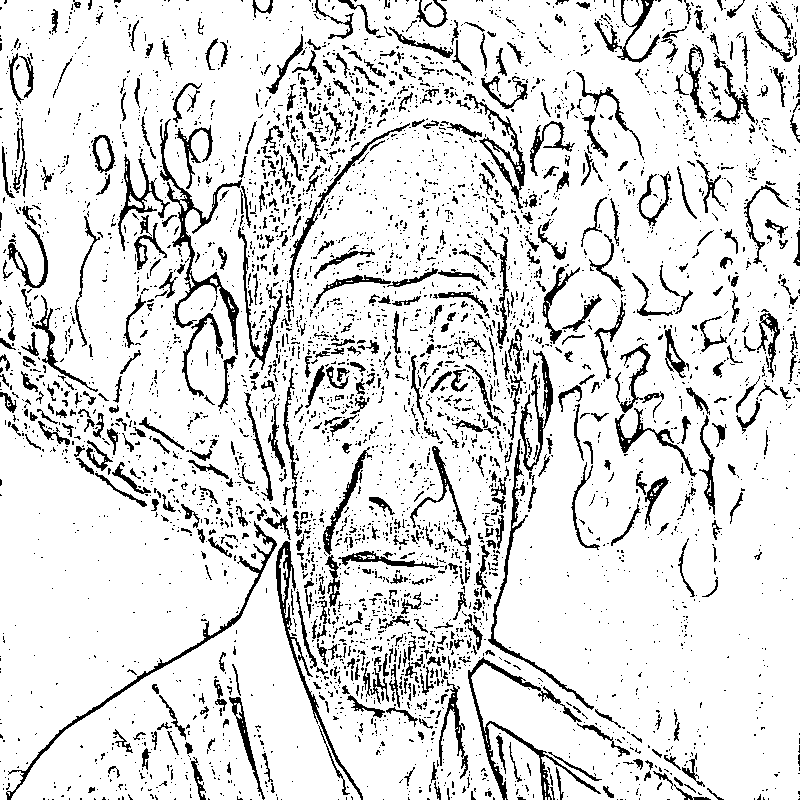

In [10]:
#ret contain the value of the threshold which is equal to 100 here
#mask contain the imaage after thresholding
#if the value is greater than 100 it convert it to black and if smaller it convert it to white
#cv2.THRESH_BINARY_INV cause the laplacian return high values for places having strong edge
ret, mask = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY_INV)
print("Threshold Mask")
cv2_imshow(mask)

In [11]:
color = img.copy()
#sigmacolor checks the intensity difference if it's small it smoothes if the difference between the intensities is small and cartooning effect maynot appear
#if it is large it smoothes if the difference is too large which may blur edges
#sigma space checks the distance between the pixels if the value of the sigma is small this means that only close pixels have effect if it has large value this means that far pixels have effect
for _ in range(5):
    color = cv2.bilateralFilter(color, d=9, sigmaColor=75, sigmaSpace=75)
#if the value pixel is 255 replace it with the colored one if it is zeo keep it zero
cartoon = cv2.bitwise_and(color, color, mask=mask)

Original Image


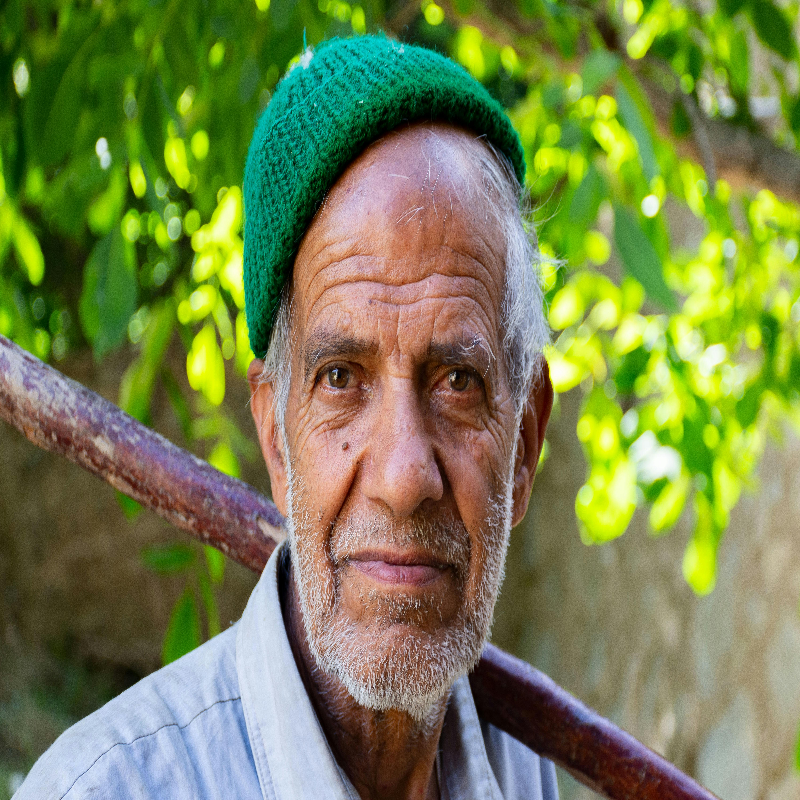

Final Cartoonified Image


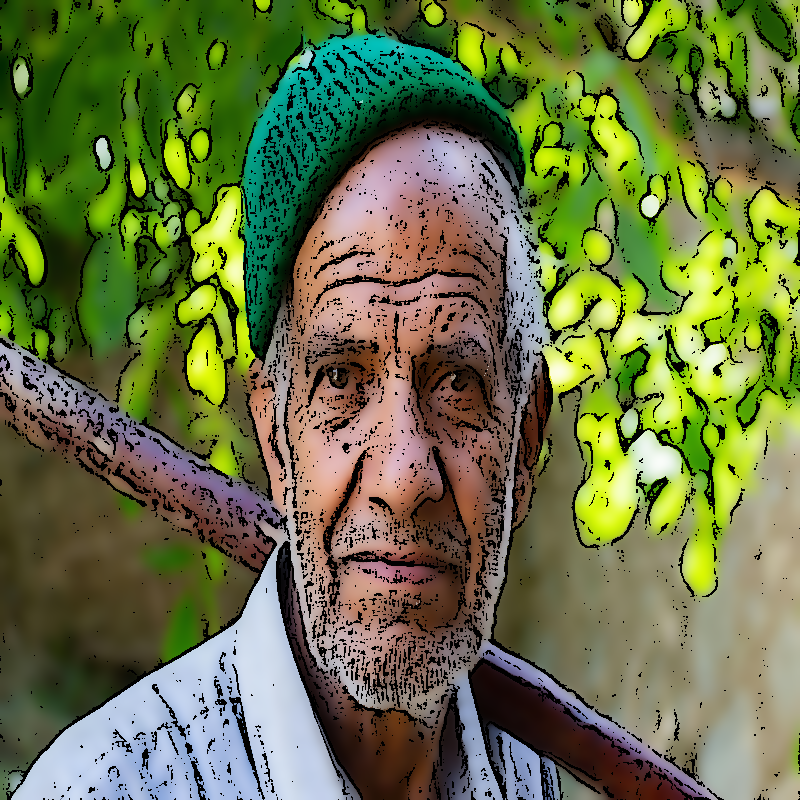

In [12]:
print("Original Image")
cv2_imshow(img)
print("Final Cartoonified Image")
cv2_imshow(cartoon)
